#### 加载模块

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 提取数据

In [4]:
heart_data = pd.read_csv('heart.csv')
feature_names = heart_data.columns.to_numpy()
feature_names = feature_names[:-1]
heart_data = heart_data.to_numpy()
data = heart_data[:,:-1]
target = heart_data[:,-1]

#### 划分训练数据和测试数据


In [5]:
X_train,X_test,y_train,y_test = train_test_split(data,target,stratify=target,random_state=42)
print('number of X_train is {}'.format(y_train.shape[0]))
print('number of X_train is {}'.format(y_test.shape[0]))

number of X_train is 227
number of X_train is 76


#### 对决策树不进行约束，建立模型并测试

In [6]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.671


#### 设置决策树的深度是4，建立模型并测试

In [9]:
tree = DecisionTreeClassifier(max_depth = 4,random_state = 0)
tree.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:0.916
Accuracy on test set:0.750


#### 分析决策树

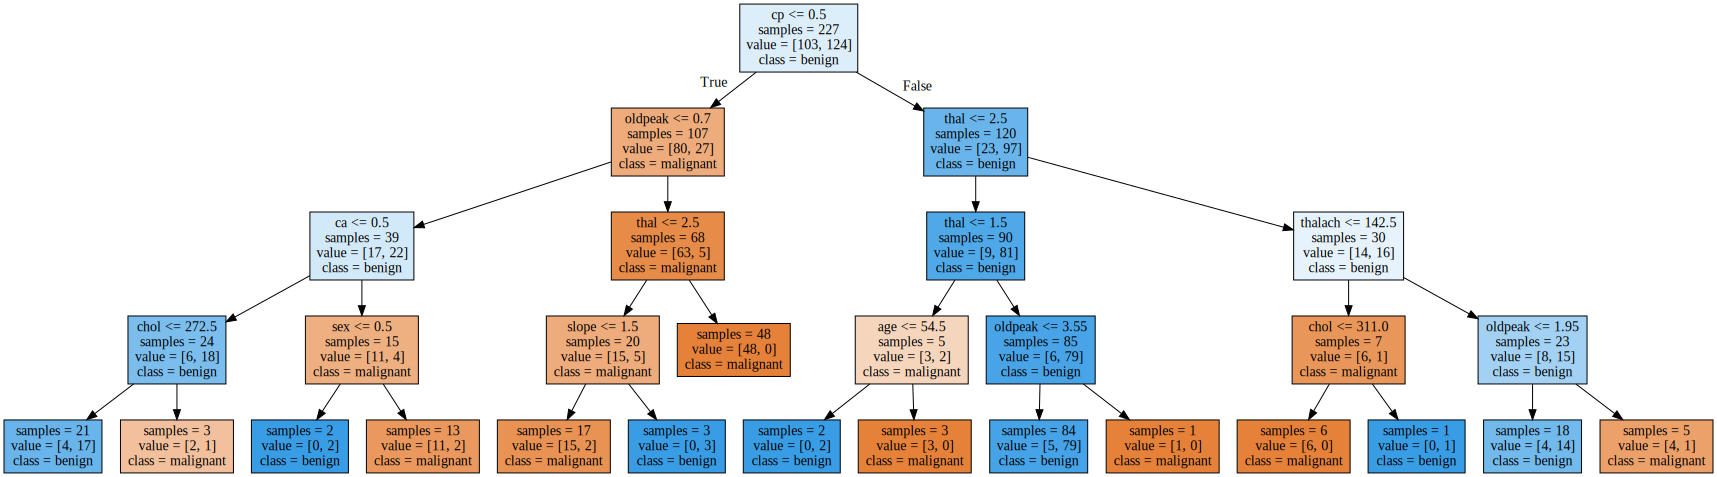

In [16]:
export_graphviz(tree,class_names=["malignant","benign"], \
               feature_names=feature_names,impurity=False,filled=True,out_file="tree.dot")
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 对树的特征重要性进行分析

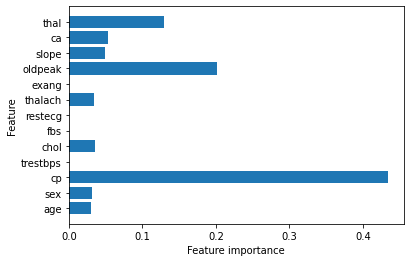

In [25]:
def plot_feature_importances(model):
    n_features = feature_names.shape[0]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances(tree)
plt.show()

#### 随机森林

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100,random_state=0,max_features=4)
forest.fit(X_train,y_train)
print("Accuracy on train set:{:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(forest.score(X_test,y_test)))

Accuracy on train set:1.000
Accuracy on test set:0.803


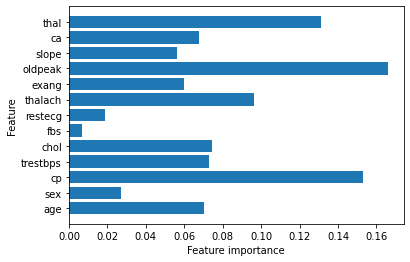

In [27]:
plot_feature_importances(forest)
plt.show()